In [3]:
import numpy as np
import pylab as plt
import scipy as sp

In [9]:
k=np.arange(2,16)


In [10]:
theta=np.linspace(0,6.3,100)
XC=np.cos(theta)
SC=np.sin(theta)

In [11]:
XX,YY=np.meshgrid(np.linspace(-1,1,100),np.linspace(-1,1,100))


In [12]:
ZZ=XX+complex(0,1)*YY

<Figure size 3200x800 with 0 Axes>

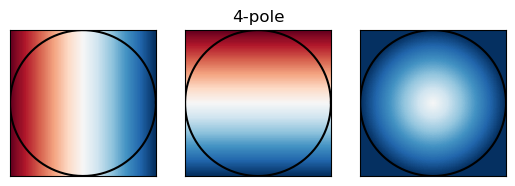

<Figure size 3200x800 with 0 Axes>

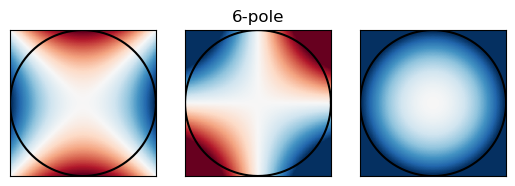

<Figure size 3200x800 with 0 Axes>

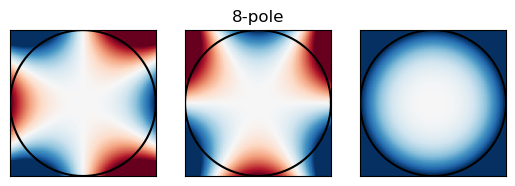

<Figure size 3200x800 with 0 Axes>

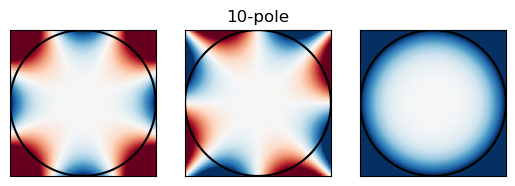

<Figure size 3200x800 with 0 Axes>

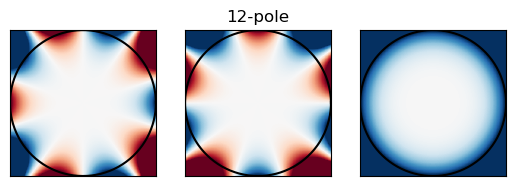

<Figure size 3200x800 with 0 Axes>

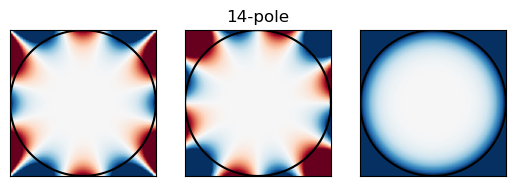

<Figure size 3200x800 with 0 Axes>

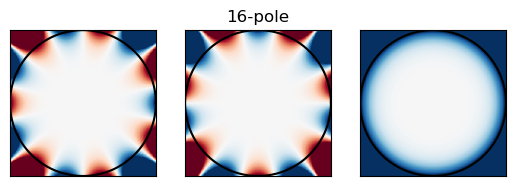

In [155]:
for k in range(2,9):
    plt.figure(figsize=(16,4),dpi=200)
    
    factor=k**2/(k**2-1)*np.sin((k+1)/(2*k)*3.14)/3.142
    #    factor=1
    Field=factor*ZZ**(k-1)
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
    ax1.imshow(Field.real,cmap='RdBu',extent=(-1,+1,-1,1),vmin=-0.3,vmax=0.3)
    ax1.plot(XC,SC,'-',color='black')

    ax2.imshow(Field.imag,cmap='RdBu',extent=(-1,+1,-1,1),vmin=-0.3,vmax=0.3)
    ax2.plot(XC,SC,'-',color='black')

    ax3.imshow(np.abs(Field),cmap='RdBu',extent=(-1,+1,-1,1),vmin=-0.3,vmax=0.3)
    ax3.plot(XC,SC,'-',color='black')
 
    pole=(k*2)
    ax2.set_title(str(pole) + "-pole")
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax3.set_xticks([])
    ax3.set_yticks([])
    
    

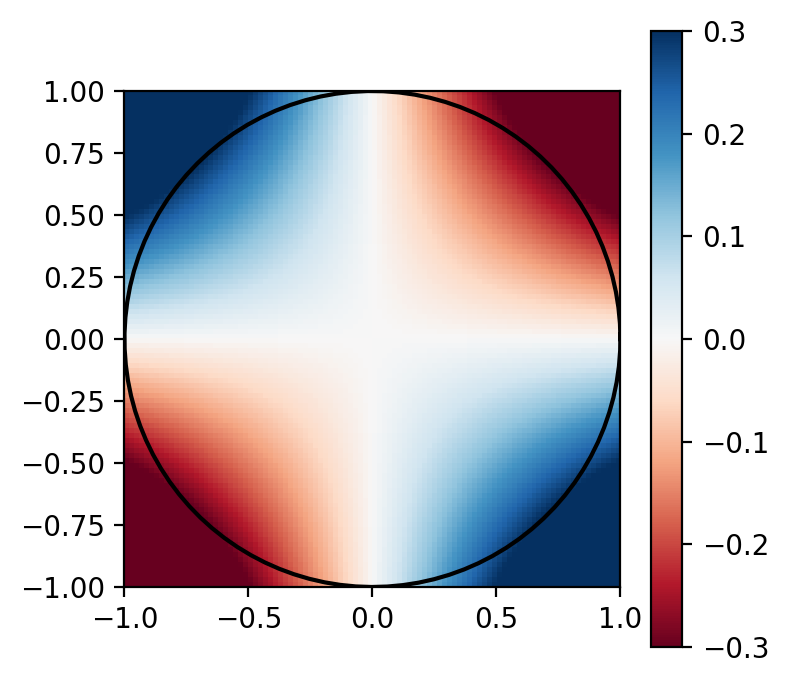

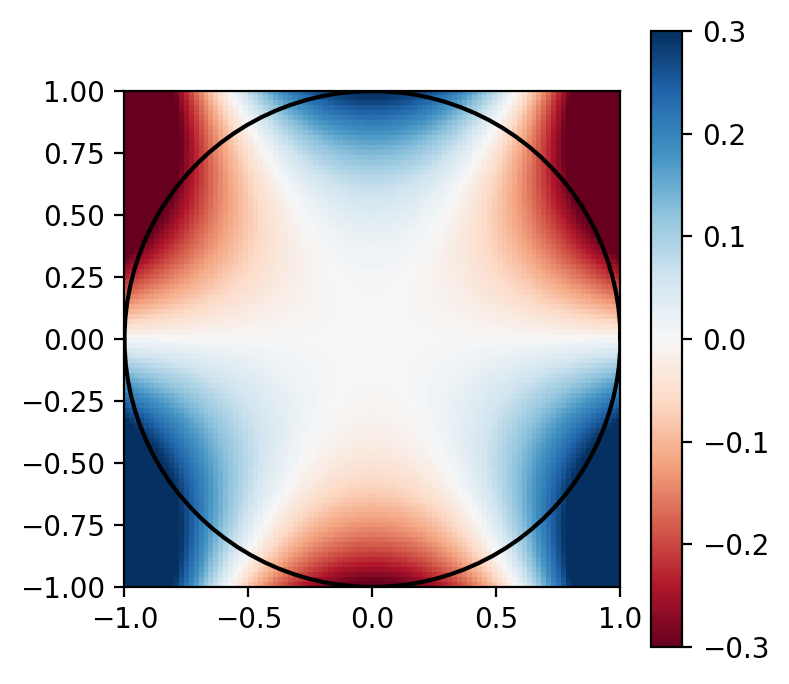

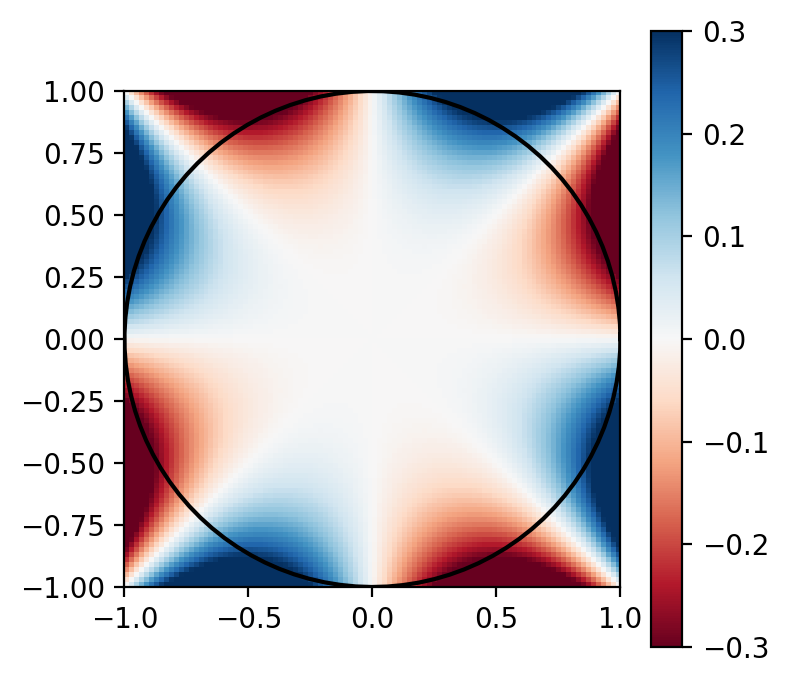

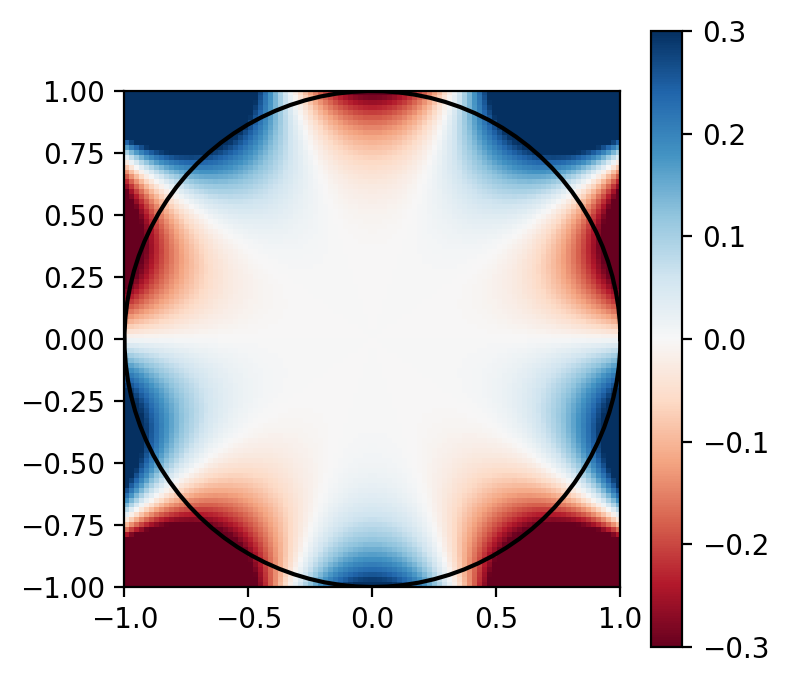

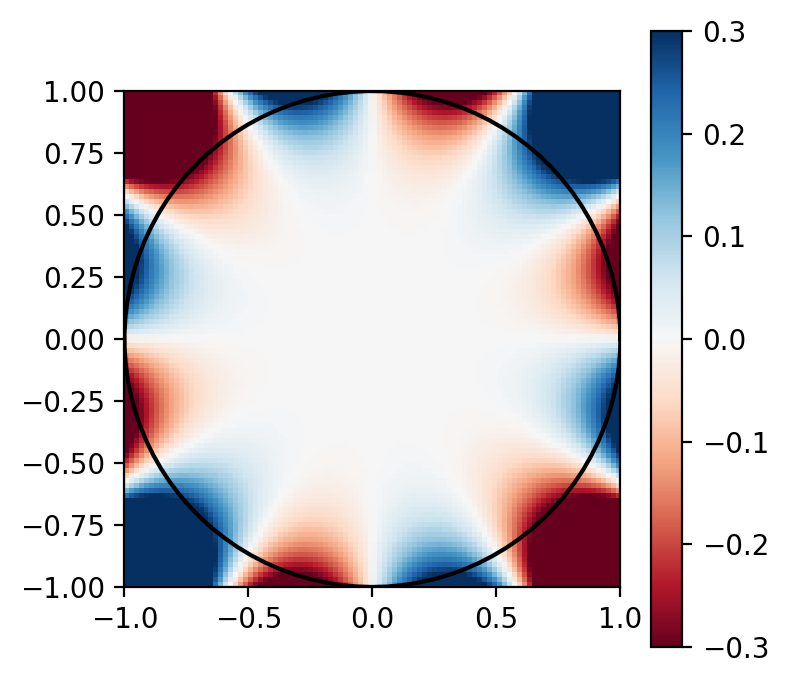

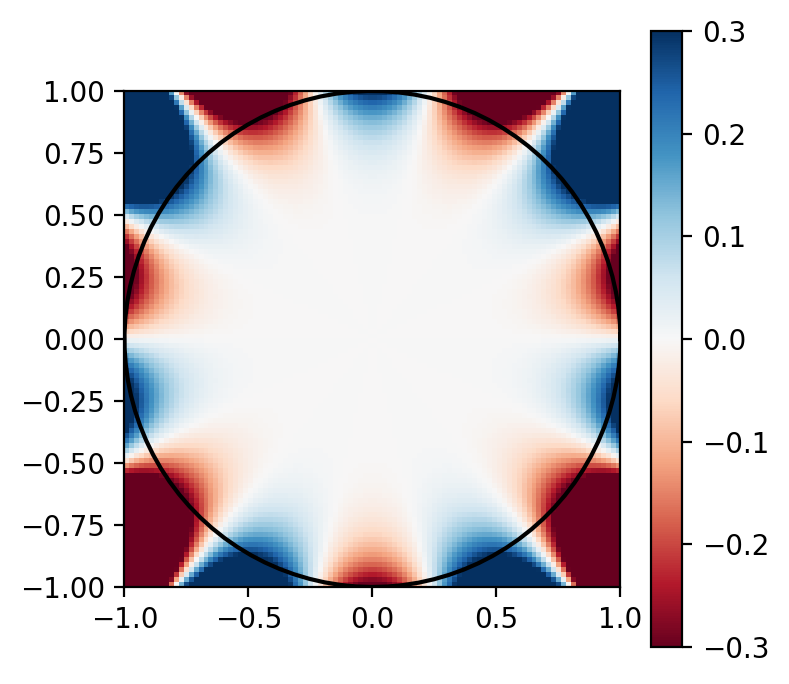

In [14]:
for k in range(2,8):
    plt.figure(figsize=(4,4),dpi=200)
    factor=k**2/(k**2-1)*np.sin((k+1)/(2*k)*3.14)/3.142
    Field=factor*ZZ**k
    plt.imshow(Field.imag,cmap='RdBu',extent=(-1,+1,-1,1))
    plt.clim(-0.3,0.3)
    plt.colorbar()
    plt.plot(XC,SC,'-',color='black')


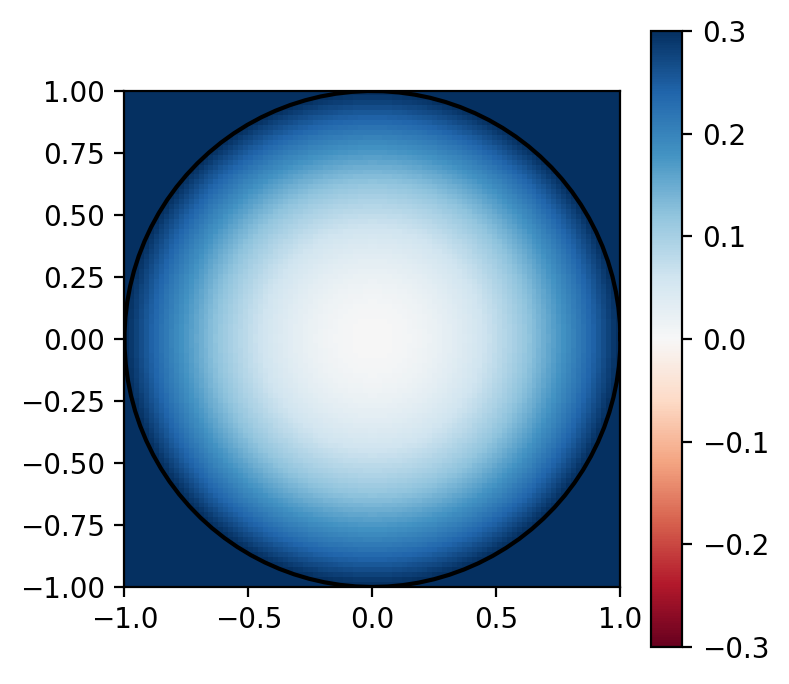

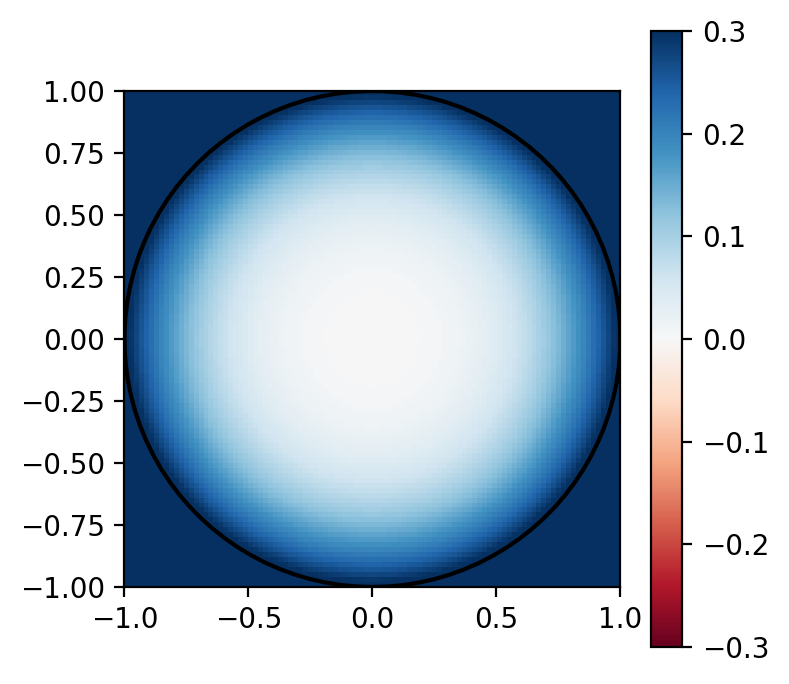

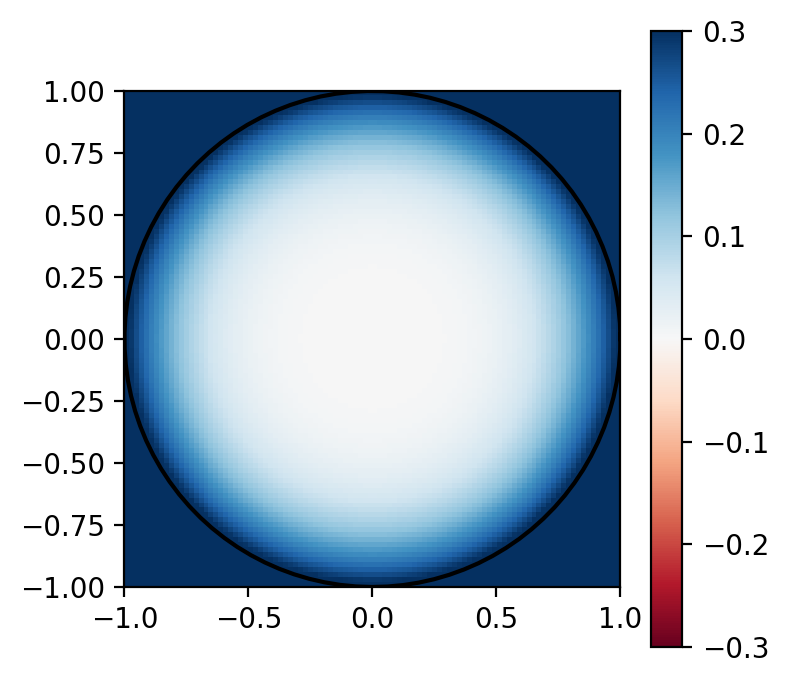

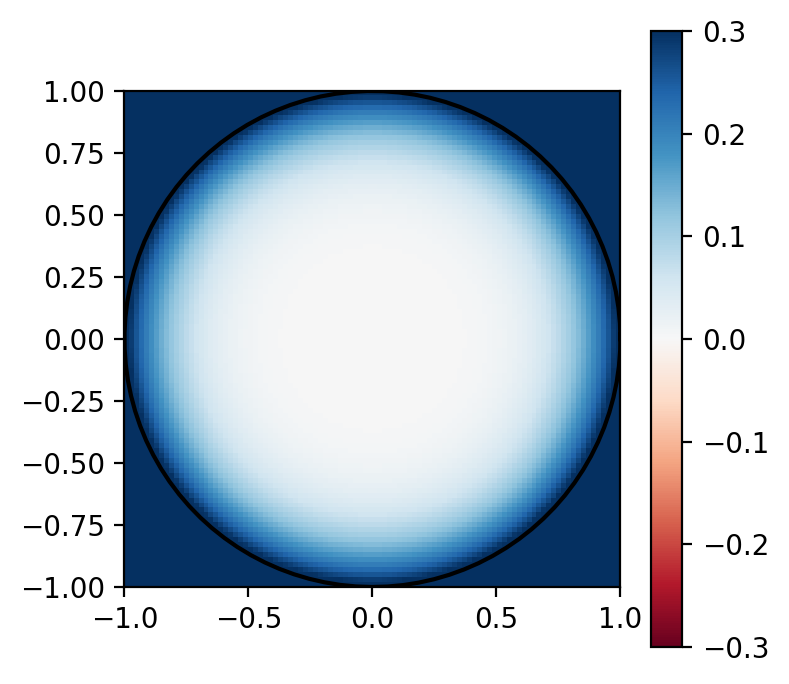

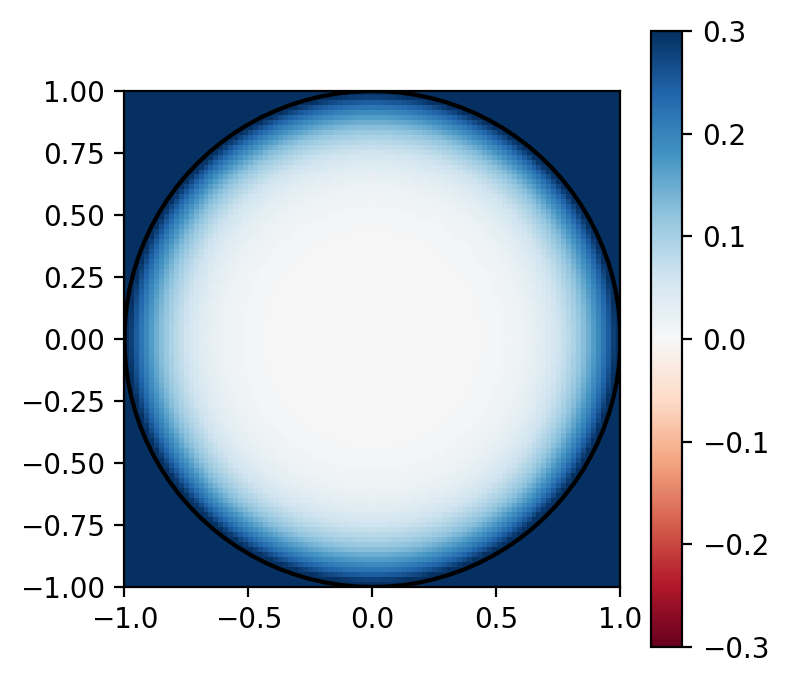

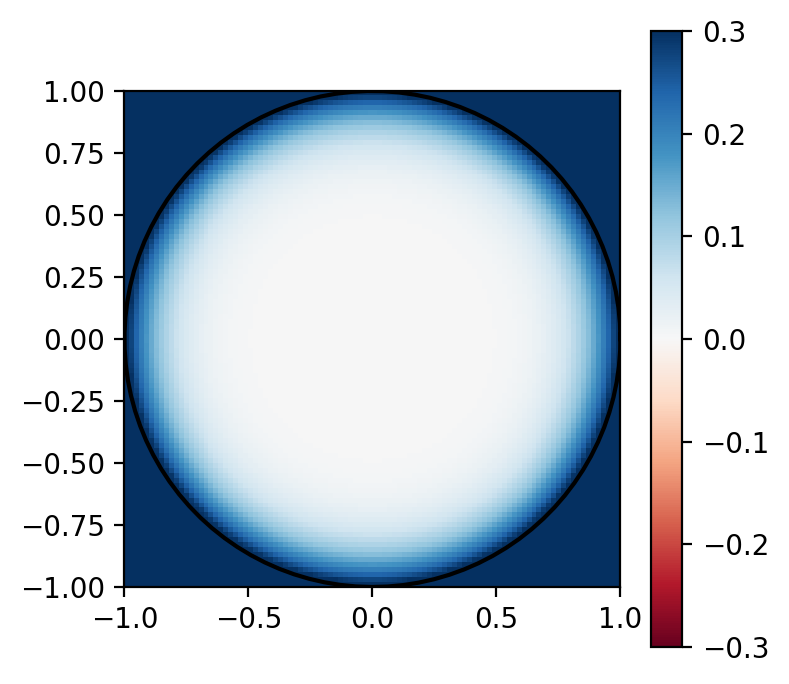

In [15]:

for k in range(2,8):
    plt.figure(figsize=(4,4),dpi=200)
    factor=k**2/(k**2-1)*np.sin((k+1)/(2*k)*3.14)/3.142
    Field=factor*ZZ**k
    plt.imshow(np.abs(Field),cmap='RdBu',extent=(-1,+1,-1,1))
    plt.clim(-0.3,0.3)
    plt.colorbar()
    plt.plot(XC,SC,'-',color='black')
    

In [16]:
vars=np.linspace(0,1,100)

(0.0, 1.0)

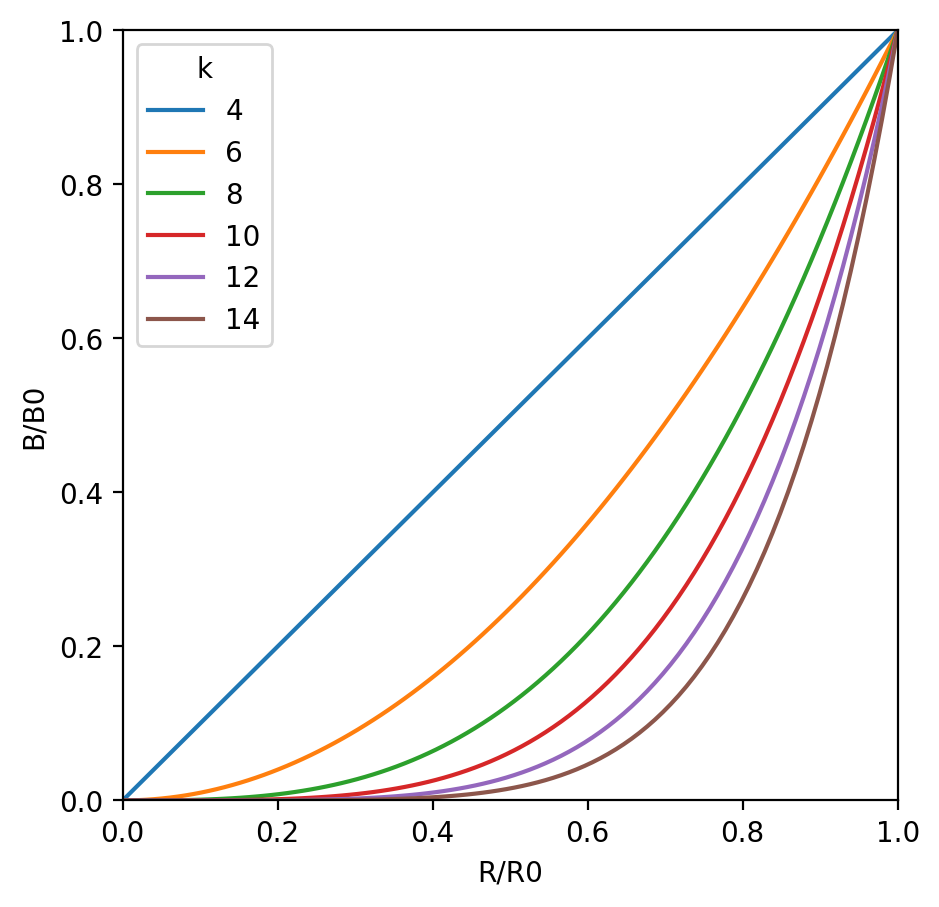

In [82]:
plt.figure(figsize=(5,5),dpi=200)
for k in range(2,8):
    plt.plot(vars,vars**(k-1),label=2*k)
plt.legend(loc='upper left',title='k')
plt.xlabel("R/R0")
plt.ylabel("B/B0")
plt.xlim(0,1)
plt.ylim(0,1)

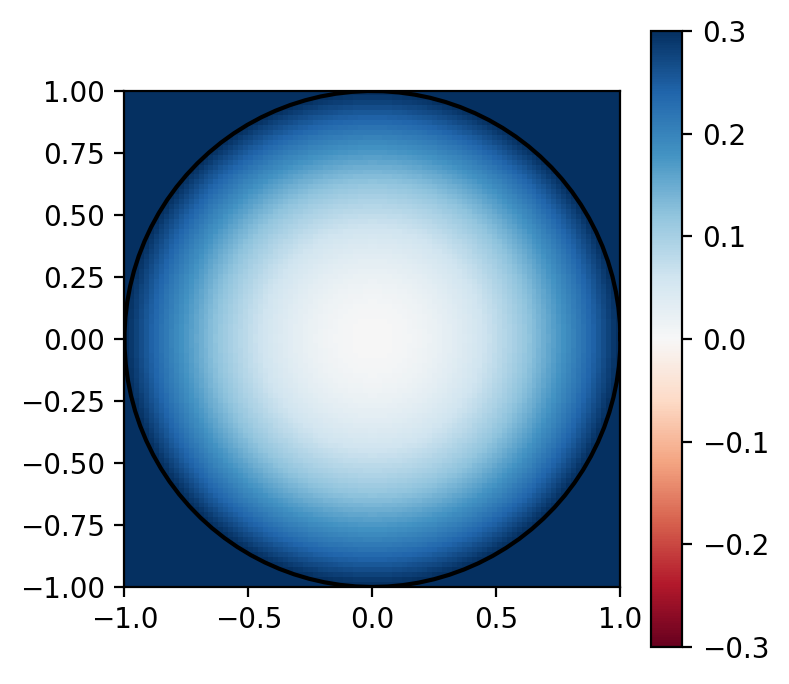

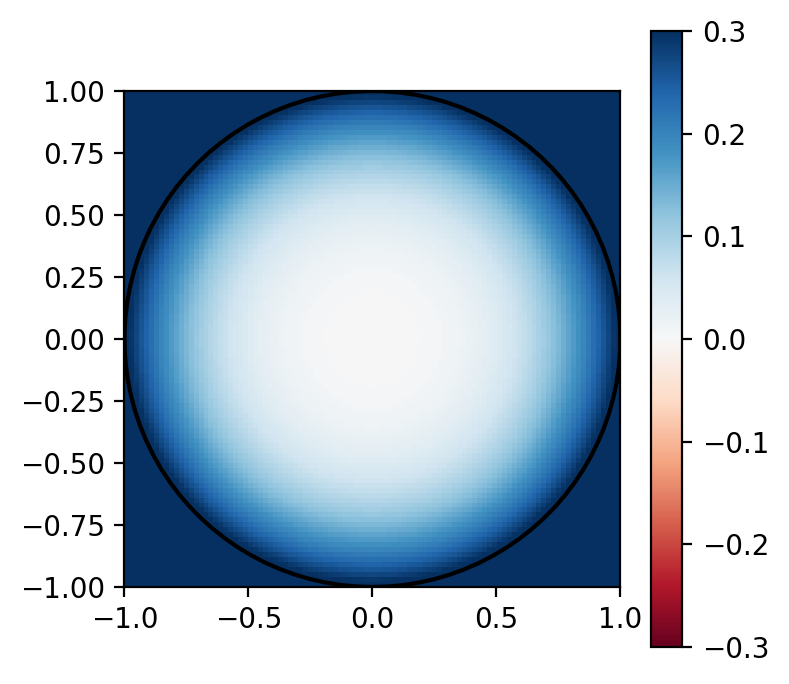

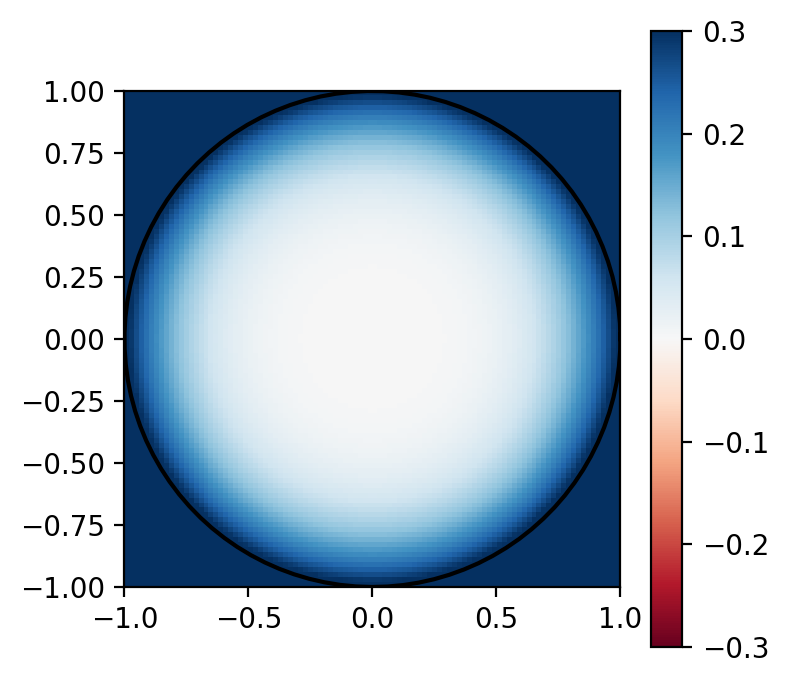

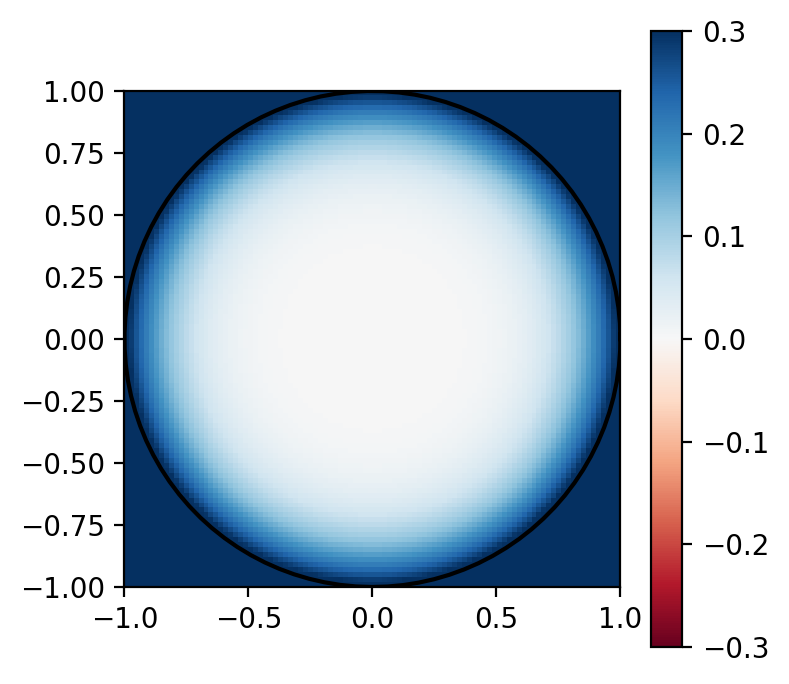

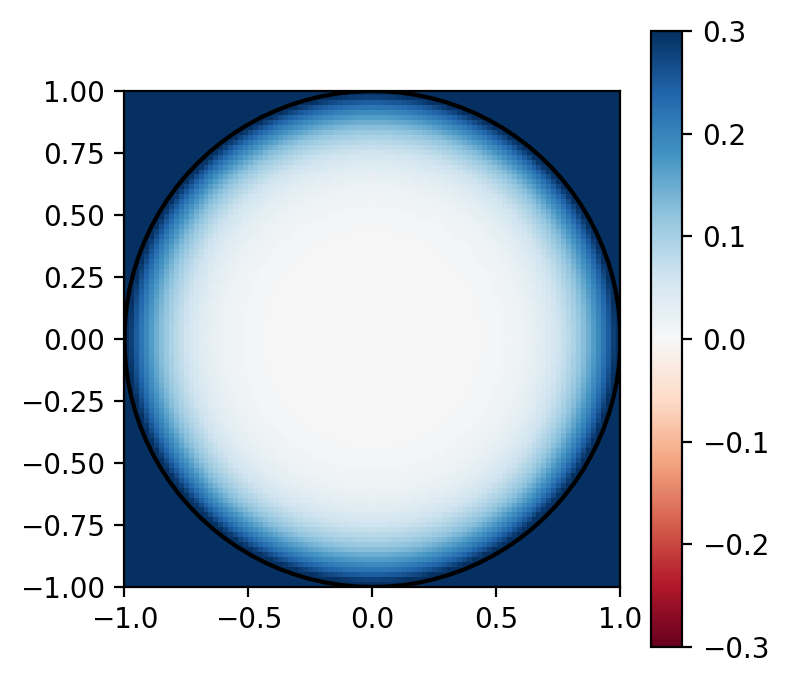

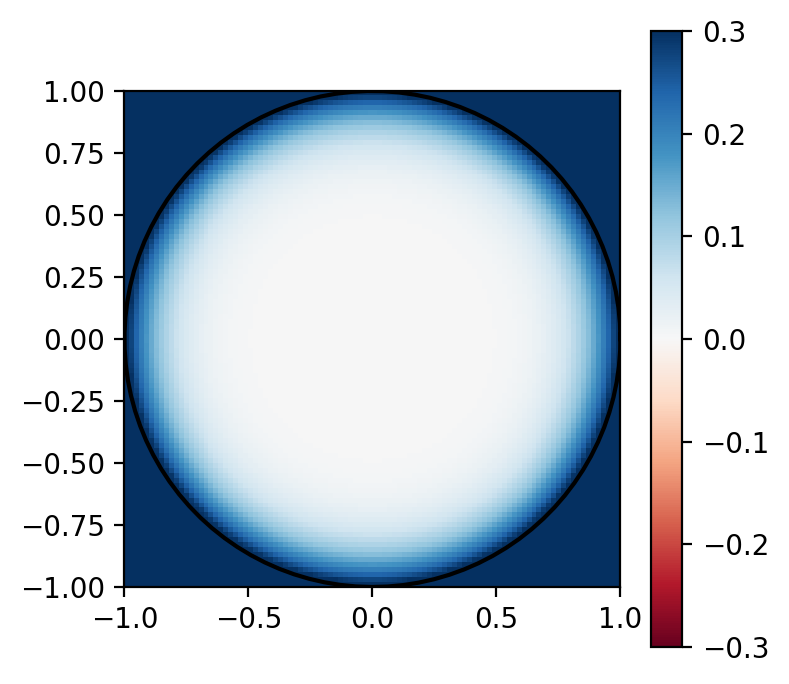

In [18]:
for k in range(2,8):
    plt.figure(figsize=(4,4),dpi=200)
    factor=k**2/(k**2-1)*np.sin((k+1)/(2*k)*3.14)/3.142
    Field=factor*ZZ**k
    plt.imshow(np.abs(Field),cmap='RdBu',extent=(-1,+1,-1,1))
    plt.clim(-0.3,0.3)
    plt.colorbar()
    plt.plot(XC,SC,'-',color='black')

In [22]:
from scipy.special import gamma

In [89]:
n=4
etaev=20
flowrate=1e21
sigma=4.52e-20
v=2.7e4

[]

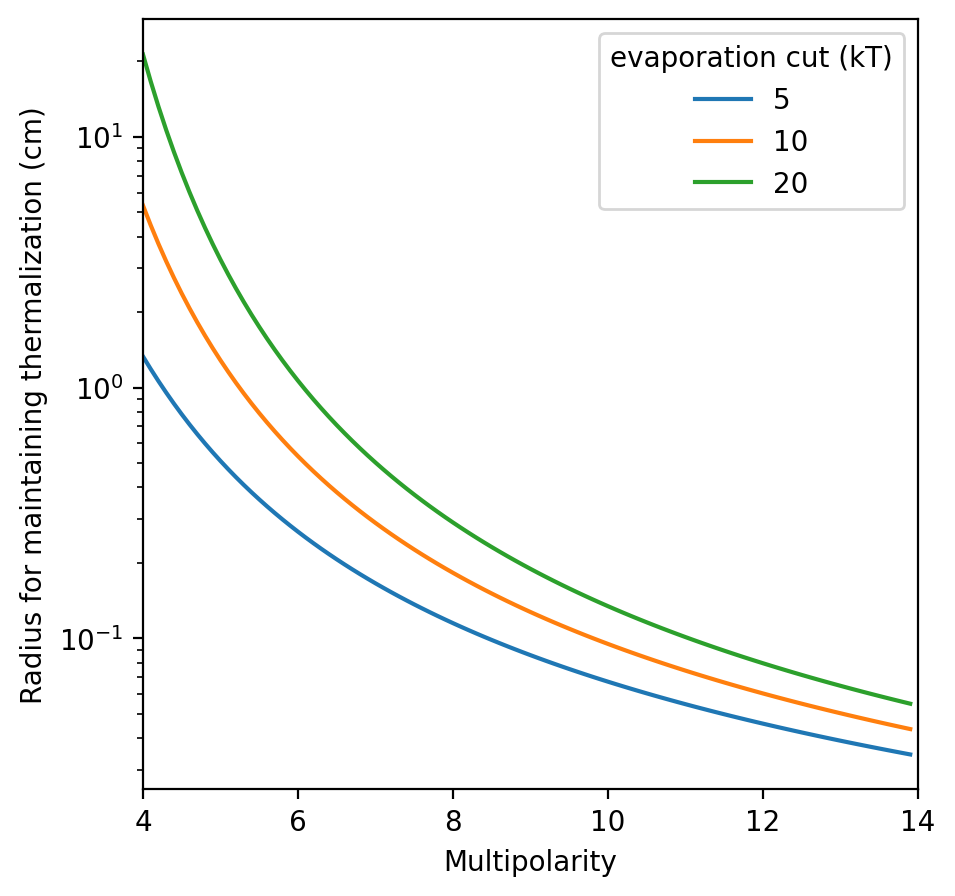

In [93]:
plt.figure(figsize=(5,5),dpi=200)
ns=np.arange(4, 14,0.1)
for etaev in [5,10,20]:
    Rs=[]
    for n in ns:
        Rs.append(1/(2*np.pi*gamma(4/(n-2)))*etaev**(4/(n-2))*flowrate*sigma/v)
    Rs=np.array(Rs)
    plt.plot(ns,Rs*100*2,label=etaev)
    pole=((n-1)*2)

plt.legend(loc='upper right',title='evaporation cut (kT)')
plt.xlabel("Multipolarity")
plt.ylabel("Radius for maintaining thermalization (cm)")
plt.xlim(4,14)
#plt.ylim(0,10)
plt.semilogy()

In [10]:
def Potential(rp,eta,N):
    return eta*rp**(N/2-1)

In [36]:
def DensityFixedR(rp,eta,N,phi,v,R):
    return phi*eta**(4/(N-2))/(2*np.pi*v*sp.special.gamma((N+2)/(N-2))*R**2)*np.exp(-eta*rp**(N/2-1))

In [37]:
eta=20

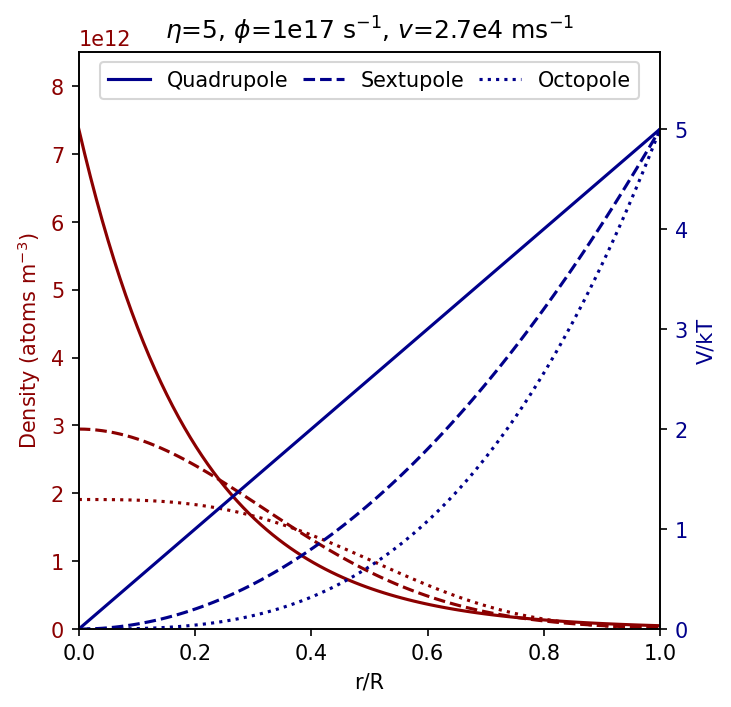

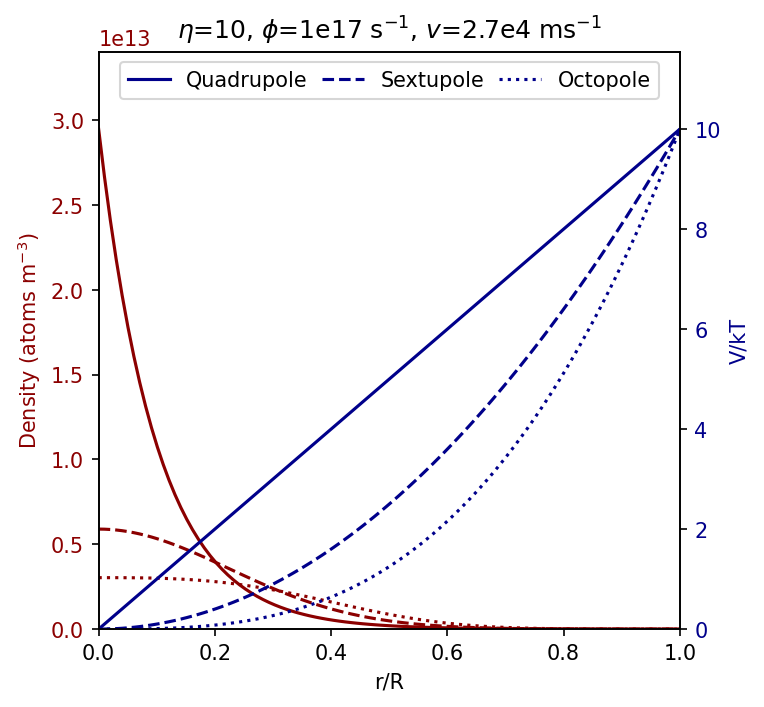

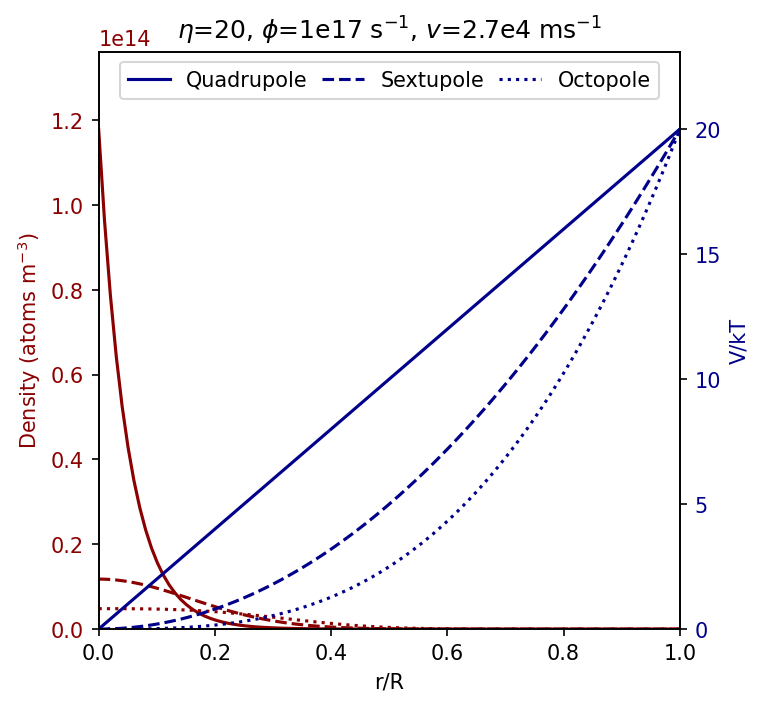

In [76]:
for eta in (5,10,20):

    rps=np.linspace(0,1,100)
    fig, ax1 = plt.subplots(figsize=(5,5),dpi=150) 
    Ns=[4,6,8]
    LineTypes=['-','--',':']
    Names=['Quadrupole','Sextupole','Octopole']
    ax1.set_xlabel('r/R')
    ax2 = ax1.twinx() 
    ax2.tick_params(axis ='y', labelcolor = 'DarkBlue') 
    ax2.set_ylabel('V/kT',color='DarkBlue') 


    ax1.tick_params(axis ='y', labelcolor = 'DarkRed') 
    ax1.set_ylabel('Density (atoms m$^{-3}$)',color='DarkRed') 

    for Ni in range(0,len(Ns)):
        ax2.plot(rps,Potential(rps,eta,Ns[Ni]),color='DarkBlue',label=Names[Ni],linestyle=LineTypes[Ni]) 
        ax1.plot(rps,DensityFixedR(rps,eta,Ns[Ni],1e17,2.7e4,1),color='DarkRed',linestyle=LineTypes[Ni]) 
    ax1.set_ylim(0,ax1.get_ylim()[1]*1.1)
    ax2.set_ylim(0,ax2.get_ylim()[1]*1.1)
    ax1.set_xlim(0,1)
    ax2.legend(loc='upper center',ncol=3,columnspacing=0.7)
    plt.title("$\eta$="+str(eta)+", $\phi$=1e17 s$^{-1}$, $v$=2.7e4 ms$^{-1}$")

    plt.show()

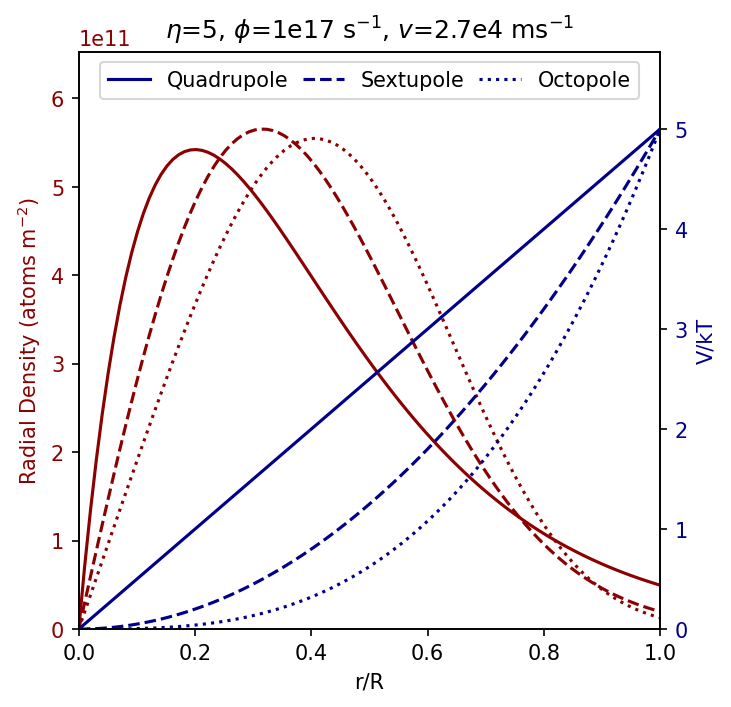

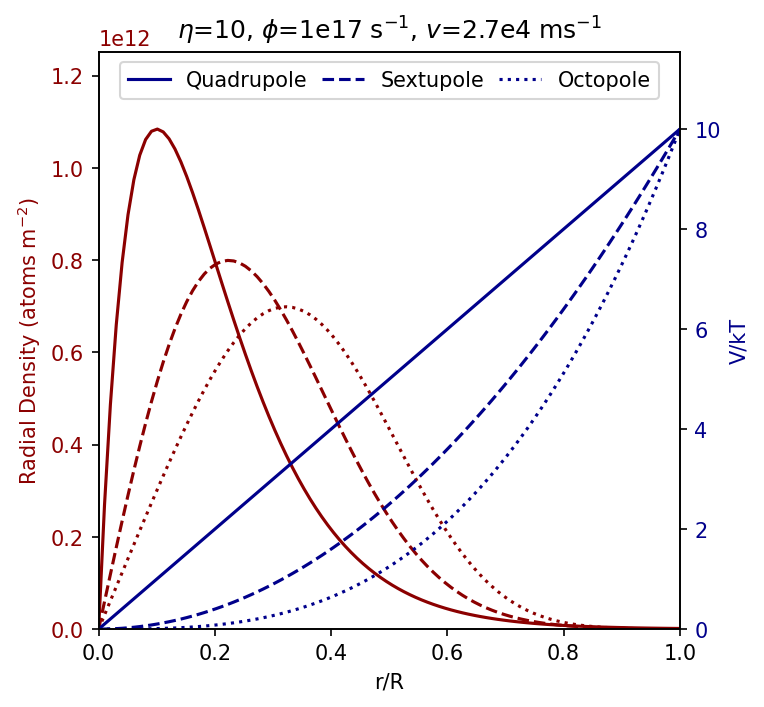

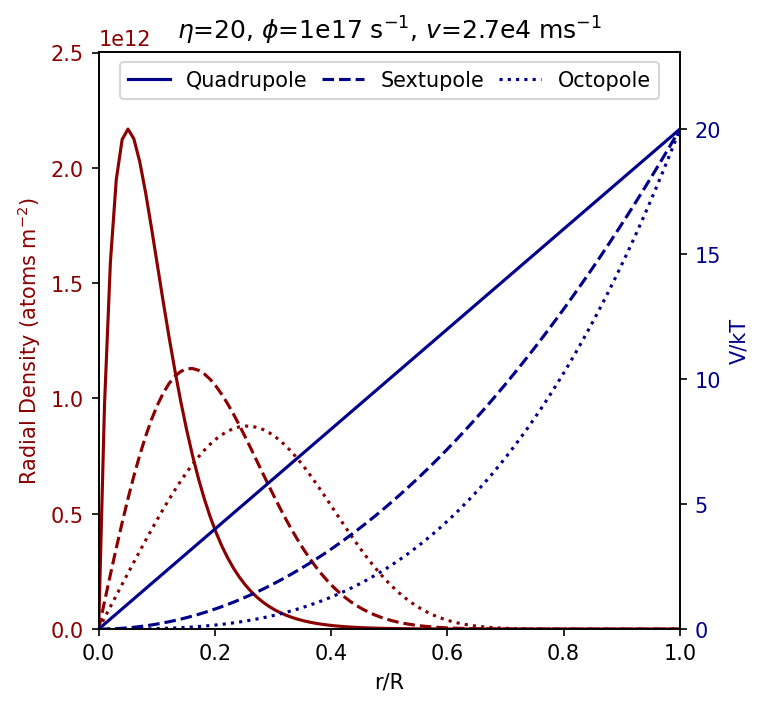

In [77]:
for eta in (5,10,20):

    rps=np.linspace(0,1,100)
    fig, ax1 = plt.subplots(figsize=(5,5),dpi=150) 
    Ns=[4,6,8]
    LineTypes=['-','--',':']
    Names=['Quadrupole','Sextupole','Octopole']
    ax1.set_xlabel('r/R')
    ax2 = ax1.twinx() 
    ax2.tick_params(axis ='y', labelcolor = 'DarkBlue') 
    ax2.set_ylabel('V/kT',color='DarkBlue') 


    ax1.tick_params(axis ='y', labelcolor = 'DarkRed') 
    ax1.set_ylabel('Radial Density (atoms m$^{-2}$)',color='DarkRed') 

    for Ni in range(0,len(Ns)):
        ax2.plot(rps,Potential(rps,eta,Ns[Ni]),color='DarkBlue',label=Names[Ni],linestyle=LineTypes[Ni]) 
        ax1.plot(rps,DensityFixedR(rps,eta,Ns[Ni],1e17,2.7e4,1)*rps,color='DarkRed',linestyle=LineTypes[Ni]) 
    plt.xlim(0,1)
    ax1.set_ylim(0,ax1.get_ylim()[1]*1.1)
    ax2.set_ylim(0,ax2.get_ylim()[1]*1.1)

    ax2.legend(loc='upper center',ncol=3,columnspacing=0.7)
    plt.title("$\eta$="+str(eta)+", $\phi$=1e17 s$^{-1}$, $v$=2.7e4 ms$^{-1}$")

    plt.show()
    
    

In [81]:
def EKin(rp,eta,N,phi,v,R):
    return 3/2*DensityFixedR(rp,eta,N,phi,v,R)
def EPot(rp,eta,N,phi,v,R):
    return DensityFixedR(rp,eta,N,phi,v,R)*Potential(rp,eta,N)

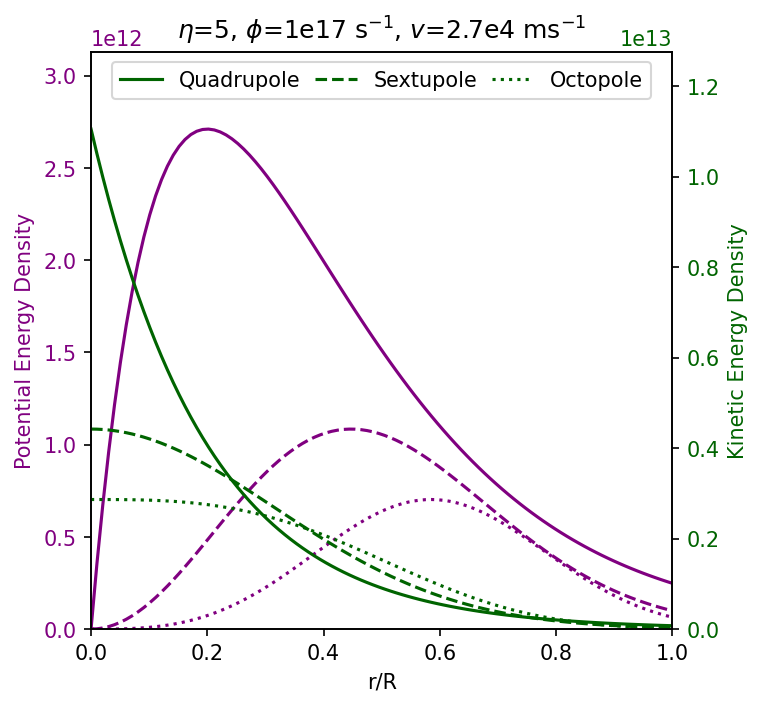

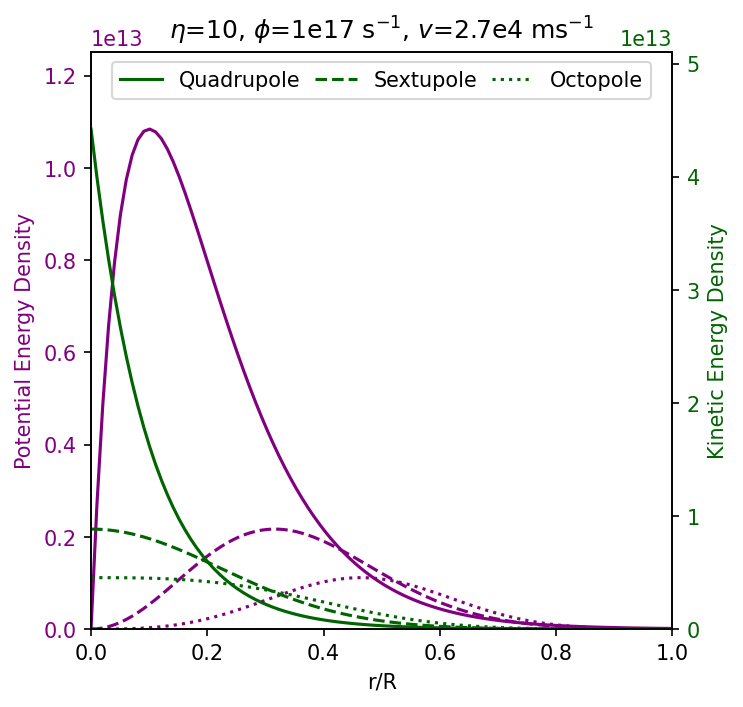

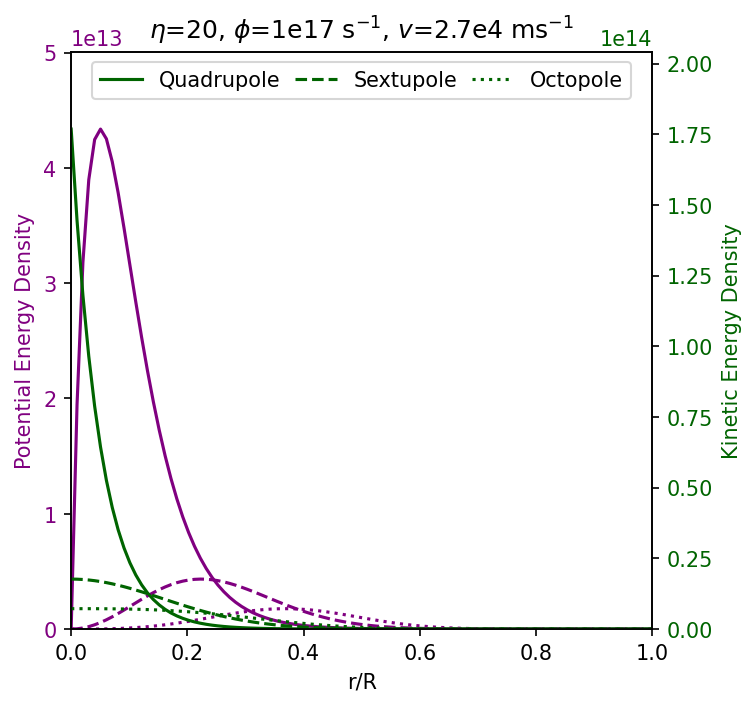

In [83]:
for eta in (5,10,20):

    rps=np.linspace(0,1,100)
    fig, ax1 = plt.subplots(figsize=(5,5),dpi=150) 
    Ns=[4,6,8]
    LineTypes=['-','--',':']
    Names=['Quadrupole','Sextupole','Octopole']
    ax1.set_xlabel('r/R')
    ax2 = ax1.twinx() 
    ax2.tick_params(axis ='y', labelcolor = 'DarkGreen') 
    ax2.set_ylabel('Kinetic Energy Density',color='DarkGreen') 


    ax1.tick_params(axis ='y', labelcolor = 'purple') 
    ax1.set_ylabel('Potential Energy Density',color='purple') 

    for Ni in range(0,len(Ns)):
        ax2.plot(rps,EKin(rps,eta,Ns[Ni],1e17,2.7e4,1),color='DarkGreen',label=Names[Ni],linestyle=LineTypes[Ni]) 
        ax1.plot(rps,EPot(rps,eta,Ns[Ni],1e17,2.7e4,1),color='purple',linestyle=LineTypes[Ni]) 
    plt.xlim(0,1)
    ax1.set_ylim(0,ax1.get_ylim()[1]*1.1)
    ax2.set_ylim(0,ax2.get_ylim()[1]*1.1)

    ax2.legend(loc='upper center',ncol=3,columnspacing=0.7)
    plt.title("$\eta$="+str(eta)+", $\phi$=1e17 s$^{-1}$, $v$=2.7e4 ms$^{-1}$")

    plt.show()
    

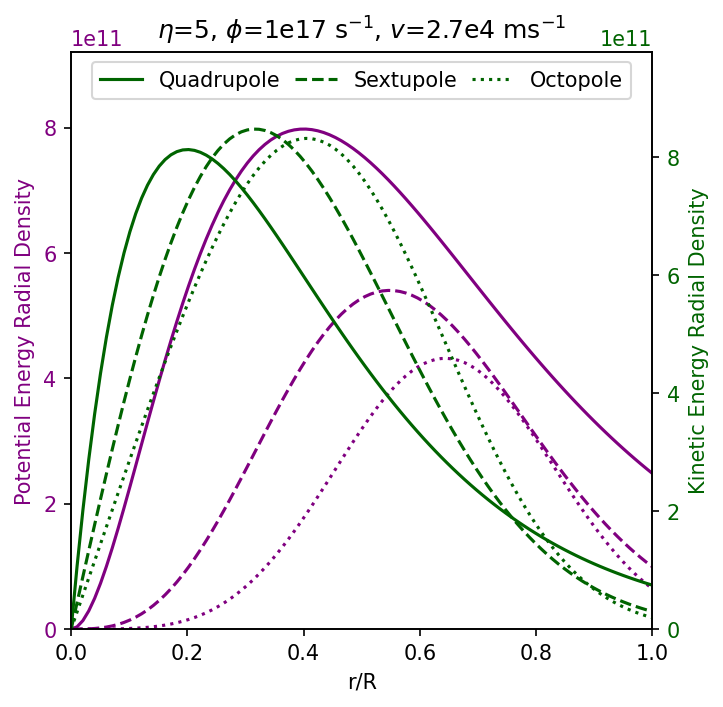

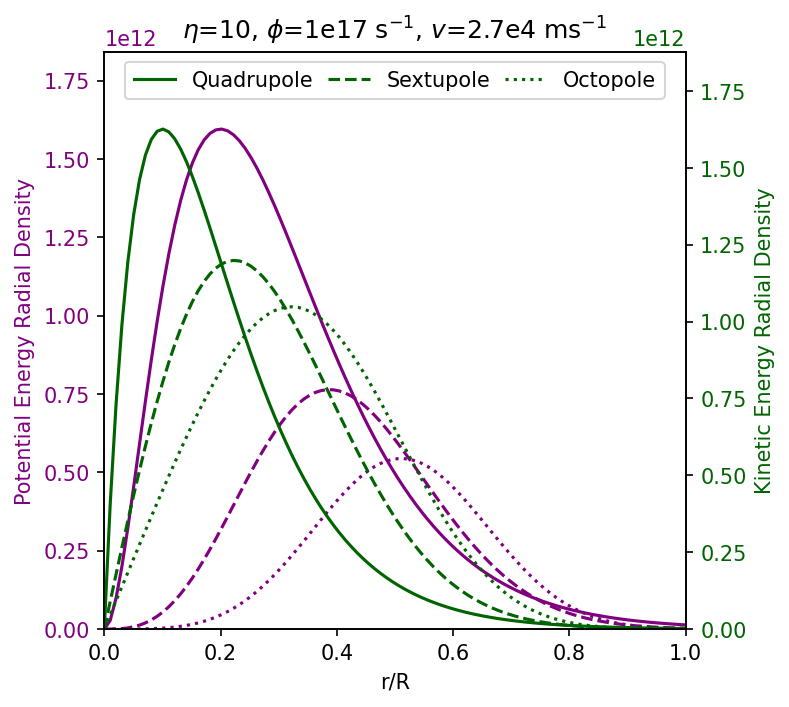

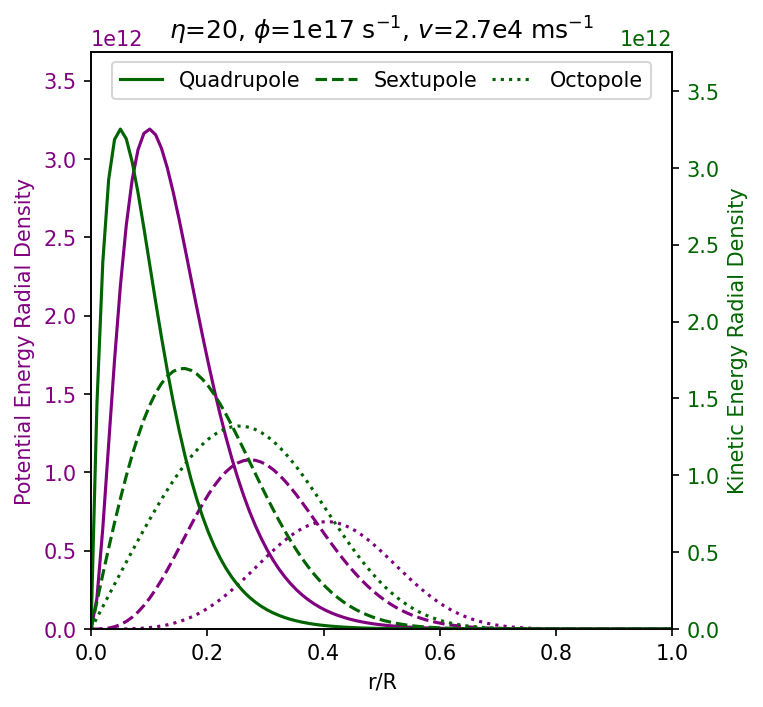

In [85]:
for eta in (5,10,20):

    rps=np.linspace(0,1,100)
    fig, ax1 = plt.subplots(figsize=(5,5),dpi=150) 
    Ns=[4,6,8]
    LineTypes=['-','--',':']
    Names=['Quadrupole','Sextupole','Octopole']
    ax1.set_xlabel('r/R')
    ax2 = ax1.twinx() 
    ax2.tick_params(axis ='y', labelcolor = 'DarkGreen') 
    ax2.set_ylabel('Kinetic Energy Radial Density',color='DarkGreen') 


    ax1.tick_params(axis ='y', labelcolor = 'purple') 
    ax1.set_ylabel('Potential Energy Radial Density',color='purple') 

    for Ni in range(0,len(Ns)):
        ax2.plot(rps,EKin(rps,eta,Ns[Ni],1e17,2.7e4,1)*rps,color='DarkGreen',label=Names[Ni],linestyle=LineTypes[Ni]) 
        ax1.plot(rps,EPot(rps,eta,Ns[Ni],1e17,2.7e4,1)*rps,color='purple',linestyle=LineTypes[Ni]) 
    plt.xlim(0,1)
    ax1.set_ylim(0,ax1.get_ylim()[1]*1.1)
    ax2.set_ylim(0,ax2.get_ylim()[1]*1.1)

    ax2.legend(loc='upper center',ncol=3,columnspacing=0.7)
    plt.title("$\eta$="+str(eta)+", $\phi$=1e17 s$^{-1}$, $v$=2.7e4 ms$^{-1}$")

    plt.show()

In [89]:
def etacut(rp,eta,N):
    return((1-(rp)**(N/2-1))*eta)


Text(0.5, 1.0, '$\\eta$=20')

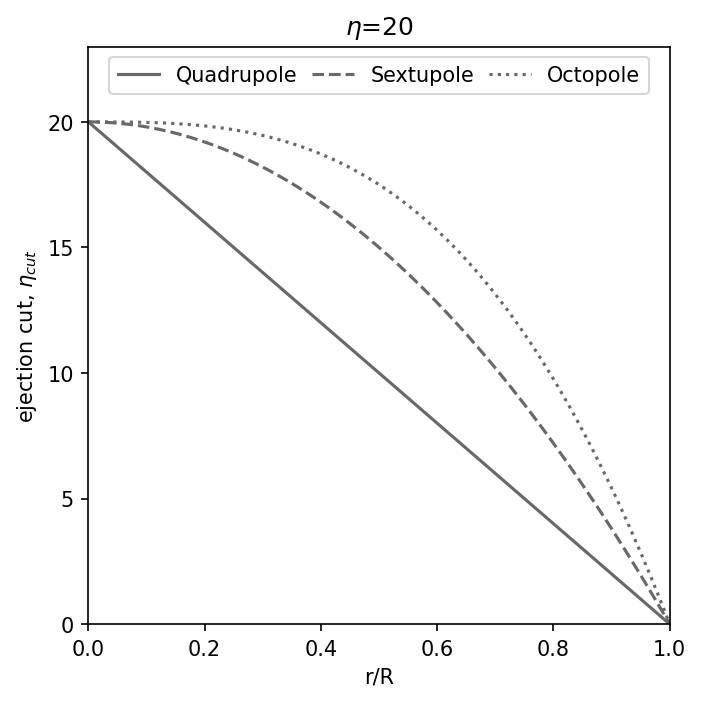

In [107]:
plt.figure(figsize=(5,5),dpi=150)
rps=np.linspace(0,1,100)

for Ni in range(0,len(Ns)):
    plt.plot(rps,etacut(rps,eta,Ns[Ni]),linestyle=LineTypes[Ni],color='dimgrey',label=Names[Ni])
plt.xlabel("r/R")
plt.ylabel("ejection cut, $\eta_{cut}$")
plt.xlim(0,1)
plt.ylim(0,23)
plt.legend(loc='upper center',ncol=3,columnspacing=0.7)

plt.title(r"$\eta$=20")